     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]
   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0  

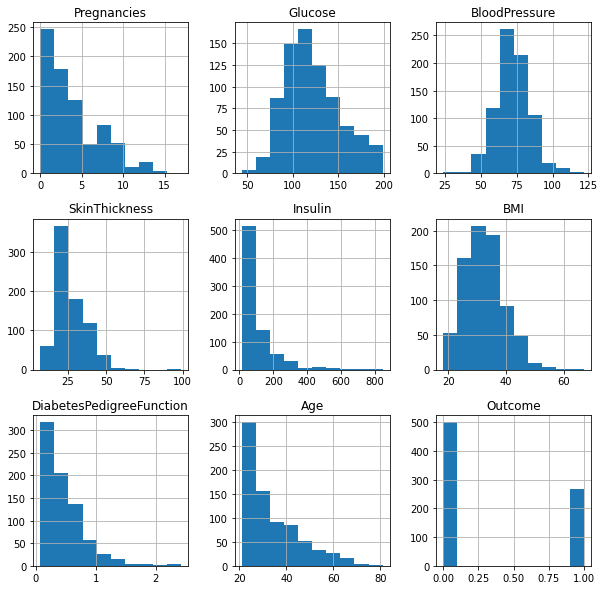

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
(768, 8)
[[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


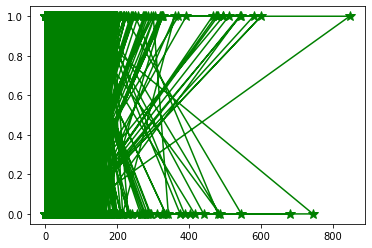

In [3]:
##IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
##LOAD THE DATASET
df = pd.read_csv("/content/diabetes.csv")
print(df)
## EDA
#1.head of the dataset
print(df.head())
print(df.tail())
print(df.sample(10))
#2.the shape of the dataset
print(df.shape)
#3.list types of all columns
print(df.dtypes)
#4.info of the dataset
print(df.info())
#5.summary of the dataset
print(df.describe())
## DATA CLEANING
#1.drop the duplicates
print(df.shape)
df=df.drop_duplicates()
print(df.shape)
#2.check the NULL values
print(df.isnull().sum())
print(df.columns)
print('no.of zero values in glucose',df[df['Glucose']==0].shape[0])
print('no.of zero values in BloodPressure',df[df['BloodPressure']==0].shape[0])
print('no.of zero values inSkinThickness',df[df['SkinThickness']==0].shape[0])
print('no.of zero values in Insulin',df[df['Insulin']==0].shape[0])
# print('no.of zero values in BMI',df[df['BMI']==0].shape[0])

df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
print('no.of zero values in glucose',df[df['Glucose']==0].shape[0])
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
print(df.describe())
##HISTOGRAMS
df.hist(bins=10,figsize=(10,10))
plt.show()
#splitting the dataset
x = df.iloc[:,0:8].values
y = df.iloc[:,8:9].values
print(x)
print(x.shape)
print(y)
print(y.shape)
#training/testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =
0.2,random_state=7)
print(x_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
#feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
print(x_test)
# logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', max_iter=1000)

print(classifier.fit(x_train,y_train))
pred_y = classifier.predict(x_test)
print(pred_y)
# #classification matrics
from sklearn.metrics import accuracy_score
w = accuracy_score(y_test,pred_y)
print(w)
from sklearn.metrics import confusion_matrix
q = confusion_matrix(y_test,pred_y)
print(q)
#error evaluation
#1
#MAE-mean absolute error
#2
#MSE-mean squared error
m = pred_y - y_test
print(m)
n = np.abs(pred_y - y_test).mean()
print(n)
from sklearn import metrics
c = metrics.mean_absolute_error(y_test,pred_y)
print(c)
s = metrics.mean_squared_error(y_test,pred_y)
print(s)
#DATA VISUALISATION
plt.plot(x,y,color = 'g',marker = "*",markersize = 10)
plt.show()